# Druckerova-Pragerova podmínka plasticity s nesdruženým zákonem plastického přetváření

---

Vypracoval: Daniel **BERÁNEK**

Předmět: **132PRPM** - Přetváření a porušování materiálů

---

**Koeficienty:**

a = 1.2

b = 1.4

c = 0.8

---

Uvažujte ideálně pružnoplastický materiál popsaný Druckerovou-Pragerovou podmínkou plasticity a nesdruženým zákonem plastického přetváření. Modul pružnosti je $E = (20 + 10a) \, \mathrm{GPa}$ a  Poissonův součinitel $\nu = 0,2$. Určete parametry funkce plasticity $\alpha_{\phi}$ a $\tau_0$ tak, aby za jednoosého tahu k plastickému přetváření došlo při napětí $\sigma = (4+b+c) \, \mathrm{MPa}$ a za jednoosého tlaku při napětí $\sigma = -(10+2b+3c) \, \mathrm{MPa}$. Součinitel dilatace položte roven jedné polovině součinitele vnitřního tření.

Pro daný model zapište podmínku plasticity za rovinné napjatosti a graficky znázorněte příslušnou plochu plasticity v rovině hlavních napětí. Dále uvažujte následující tři zatěžovací programy:
1. jednoosý tlak ve směru osy $x$,
2. dvojosý tlak v rovině $xy$ s poměrem napětí $\sigma_x : \sigma_y = 2:1$,
3. trojosý tlak s poměrem napětí $\sigma_x : \sigma_y : \sigma_z = 4:1:1$.

V každém z těchto případů pokračuje zatěžování i po dosažení plastického stavu, přičemž i v průběhu plastického přetváření je zachován předepsaný poměr normálových napětí.

Pro uvedené zatěžovací programy určete hodnoty jednotlivých složek napětí a deformace v okamžiku, kdy začne plastické přetváření, a dále hodnoty složek (celkové) deformace v okamžiku, kdy složka plastické deformace $\varepsilon_{\mathrm{p}x}$ dosáhne hodnoty $-2 \, \textperthousand$. Pro jednoosý a dvojosý tlak zakreslete dráhu napětí v rovině hlavních napětí a graficky znázorněte směr přírůstků plastické deformace.

Složky deformace zadávejte v promile (tisícinách) a napětí v $\mathrm{MPa}$. Tlakové složky označte záporným znaménkem.

***

In [1]:
from IPython.display import display, Math, Markdown
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt

In [2]:
a = 1.2
b = 1.4
c = 0.8

In [3]:
young_modulus = (20 + 10*a) * 1E3  # (MPa)
poissons_ratio = 0.2  # (1)
tension_yield = (4 + b + c)  # (MPa)
compression_yield = (10 + 2*b + 3*c) # (MPa)

## Výpočet parametrů Druckerovy-Pragerovy podmínky plasticity

Drucker-Pragerova podmínka plasticity je daná vztahem

$$
f(\bar{\sigma}) = \alpha_{\phi} I_1 (\bar{\sigma}) + \sqrt{J_2(\bar{\sigma})} - \tau_0,
$$

kde $\alpha_{\phi}$ představuje koeficient vnitřního tření, a $\tau_0$ je mezní hodnota smykového napětí. $I_1$ a $J_2$ označují první a druhý invariant napětí.

In [4]:
I1, J2 = smp.symbols('I_1 J_2')
alpha_phi = smp.symbols('alpha_phi')
tau_0 = smp.symbols('tau_0')
sigma_1, sigma_2, sigma_3 = smp.symbols('sigma_1 sigma_2 sigma_3')

In [5]:
I_1 = sigma_1 + sigma_2 + sigma_3  # prvni invariant napeti
J_2 = smp.Rational(1, 6) * ( (sigma_1 - sigma_2)**2 + (sigma_1 - sigma_3)**2 + (sigma_2 - sigma_3)**2 )  # druhy invariant napeti

In [6]:
I_1

sigma_1 + sigma_2 + sigma_3

In [7]:
J_2

(sigma_1 - sigma_2)**2/6 + (sigma_1 - sigma_3)**2/6 + (sigma_2 - sigma_3)**2/6

In [8]:
f = alpha_phi * I1 + smp.sqrt(J2) - tau_0  # funkce plasticity
f

I_1*alpha_phi + sqrt(J_2) - tau_0

In [9]:
f = f.subs(I1, I_1).subs(J2, J_2)  # funkce plasticity
f

alpha_phi*(sigma_1 + sigma_2 + sigma_3) - tau_0 + sqrt((sigma_1 - sigma_2)**2/6 + (sigma_1 - sigma_3)**2/6 + (sigma_2 - sigma_3)**2/6)

In [10]:
display(Markdown(f'Aby došlo k plastickému přetváření za jednoosého tahu při napětí {tension_yield:.2f} MPa ' 
                + f'a za jednoosého tlaku při napětí {-compression_yield:.2f} MPa, musíme vyřešit následující soustavu rovnic.'))

Aby došlo k plastickému přetváření za jednoosého tahu při napětí 6.20 MPa a za jednoosého tlaku při napětí -15.20 MPa, musíme vyřešit následující soustavu rovnic.

In [11]:
# funkce plasticity pri pocatku plastickeho pretvareni v jednoosem tahu
f_1 = f.subs(sigma_1, tension_yield).subs(sigma_2, 0).subs(sigma_3, 0)
f_1

6.2*alpha_phi - tau_0 + 2.53113940087595*sqrt(2)

In [12]:
# funkce plasticity pri pocatku plastickeho pretvareni v jednoosem tlaku
f_2 = f.subs(sigma_1, 0).subs(sigma_2, 0).subs(sigma_3, -compression_yield)
f_2

-15.2*alpha_phi - tau_0 + 5.06666666666667*sqrt(3)

In [13]:
solution = smp.solve([f_1, f_2], [alpha_phi, tau_0])  # reseni soustavy rovnic
alpha = solution[alpha_phi]  # soucinitel vnitrniho treni
tau = solution[tau_0]  # mez kluzu ve smyku
solution

{alpha_phi: 0.242810860874142, tau_0: 5.08499900639536}

Funkce plasticity má tedy tvar:

In [14]:
f = f.subs(alpha_phi, alpha).subs(tau_0, tau)  # dosazeni za nezname koeficienty D-P podminky plasticity
f

0.242810860874142*sigma_1 + 0.242810860874142*sigma_2 + 0.242810860874142*sigma_3 + sqrt((sigma_1 - sigma_2)**2/6 + (sigma_1 - sigma_3)**2/6 + (sigma_2 - sigma_3)**2/6) - 5.08499900639536

## Zatěžovací programy

# Zatěžovací program 1

- Jednoosý tlak ve směru osy x

In [15]:
display(Markdown('K plastickému přetváření za jednoosého tlaku začne docházet při napětí $\sigma_x =' + f'{-compression_yield:.2f}'+ '\,\mathrm{MPa}$.'))

K plastickému přetváření za jednoosého tlaku začne docházet při napětí $\sigma_x =-15.20\,\mathrm{MPa}$.

In [16]:
sigma_x = -compression_yield
sigma_y = 0
sigma_z = 0

sigma = np.array([sigma_x, sigma_y, sigma_z])

C = (1 / young_modulus) * np.array([
    [1, -poissons_ratio, -poissons_ratio],
    [-poissons_ratio, 1, -poissons_ratio],
    [-poissons_ratio, -poissons_ratio, 1]
])

epsilon_el = C @ sigma.T
epsilon_el

for i, (ax, eps, sig) in enumerate(zip(['x', 'y', 'z'], epsilon_el, sigma)):
    display(Math(f'\\sigma_{ax} = {sig}' + '\,\mathrm{MPa}'))
    display(Math(f'\\varepsilon_{ax} = {eps}'))
    display(Markdown('<br>'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<br>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<br>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<br>

In [17]:
alpha_psi = smp.symbols('alpha_psi') # soucinitel dilatace

In [18]:
# plasticky potencial
g = I_1 * alpha_psi + smp.sqrt(J_2) - tau_0
g

alpha_psi*(sigma_1 + sigma_2 + sigma_3) - tau_0 + sqrt((sigma_1 - sigma_2)**2/6 + (sigma_1 - sigma_3)**2/6 + (sigma_2 - sigma_3)**2/6)

In [19]:
g = g.subs(alpha_psi, alpha/2).subs(tau_0, tau)
g

0.121405430437071*sigma_1 + 0.121405430437071*sigma_2 + 0.121405430437071*sigma_3 + sqrt((sigma_1 - sigma_2)**2/6 + (sigma_1 - sigma_3)**2/6 + (sigma_2 - sigma_3)**2/6) - 5.08499900639536

In [20]:
dgdsx = smp.diff(g, sigma_1)  # vypocet derivace plastickeho potencialu podle sigma_x
dgdsx

(sigma_1/3 - sigma_2/6 - sigma_3/6)/sqrt((sigma_1 - sigma_2)**2/6 + (sigma_1 - sigma_3)**2/6 + (sigma_2 - sigma_3)**2/6) + 0.121405430437071

In [21]:
lamb = ((-2/1000) / dgdsx.subs(sigma_1, sigma_x).subs(sigma_2, sigma_y).subs(sigma_3, sigma_z)).evalf()

In [22]:
# vypocet celkove deformace
for i, (ax, sig) in enumerate(zip(['x', 'y', 'z'], [sigma_1, sigma_2, sigma_3])):
    eps_pl = lamb * smp.diff(g, sig).subs(sigma_1, sigma_x).subs(sigma_2, sigma_y).subs(sigma_3, sigma_z)  # plasticka deformace: eps_pl = lambda * dg/dsigma
    eps_tot = eps_pl.evalf() + epsilon_el[i]  # soucet elasticke a plasticke deformace
    display(Math('\\varepsilon_{tot,' + ax + '} = ' + f'{eps_tot}'))

    # display(Math('df/d \\sigma_{' + ax + '} = ' + f'{smp.diff(f, sig).subs(sigma_1, sigma_x).subs(sigma_2, sigma_y).subs(sigma_3, sigma_z).evalf()}'))
    # display(Math('dg/d \\sigma_{' + ax + '} = ' + f'{smp.diff(g, sig).subs(sigma_1, sigma_x).subs(sigma_2, sigma_y).subs(sigma_3, sigma_z).evalf()}'))
    
    display(Markdown('<br>'))

<IPython.core.display.Math object>

<br>

<IPython.core.display.Math object>

<br>

<IPython.core.display.Math object>

<br>

In [23]:
func = smp.lambdify([sigma_1, sigma_2], f.subs(sigma_3, 0))

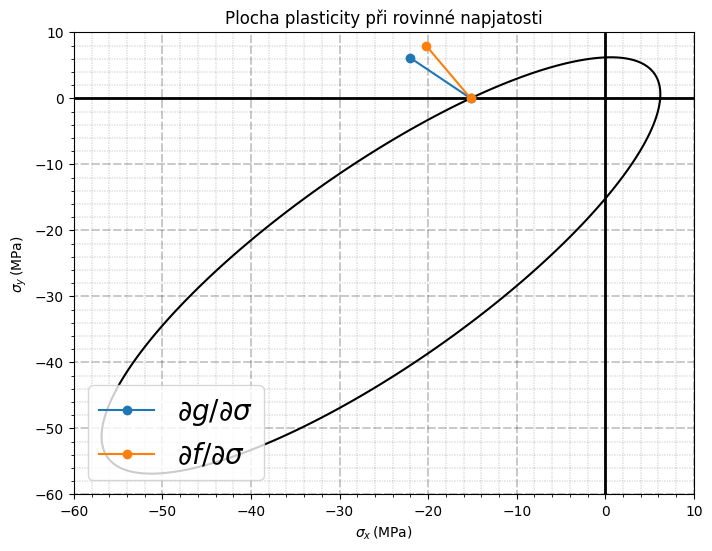

In [24]:
# Create a grid of sigma_1 and sigma_2 values
sigma1 = np.linspace(-60, 10, 200)
sigma2 = np.linspace(-60, 10, 200)
sigma1, sigma2 = np.meshgrid(sigma1, sigma2)

z = func(sigma1, sigma2)

# Plot the contour where the expression equals zero
plt.figure(figsize=(8, 6))

plt.axhline(0, color='k', lw=2)
plt.axvline(0, color='k', lw=2)

contour = plt.contour(sigma1, sigma2, z, levels=[0], colors='k')

scale = 15

plt.plot([-compression_yield, -compression_yield + smp.diff(g, sigma_1).subs(sigma_1, sigma_x).subs(sigma_2, sigma_y).subs(sigma_3, sigma_z) * scale], 
         [0, smp.diff(g, sigma_2).subs(sigma_1, sigma_x).subs(sigma_2, sigma_y).subs(sigma_3, sigma_z) * scale], '-o', label='$\partial g / \partial\sigma$')

plt.plot([-compression_yield, -compression_yield + smp.diff(f, sigma_1).subs(sigma_1, sigma_x).subs(sigma_2, sigma_y).subs(sigma_3, sigma_z) * scale], 
         [0, smp.diff(f, sigma_2).subs(sigma_1, sigma_x).subs(sigma_2, sigma_y).subs(sigma_3, sigma_z) * scale], '-o', label='$\partial f / \partial\sigma$')


plt.xlabel(r'$\sigma_x \, \mathrm{(MPa)}$')
plt.ylabel('$\sigma_y \, \mathrm{(MPa)}$')
plt.title('Plocha plasticity při rovinné napjatosti')

plt.grid(which="major", linestyle=(10, (20, 6)), color='black', lw=0.3)
plt.minorticks_on()
plt.grid(which="minor", linestyle=(0, (1, 3)), color='black', lw=0.3)

plt.legend(fontsize=20)

plt.show()

# Zatěžovací program 2

- Dvojosý tlak ve rovině $xy$ s poměrem napětí $\sigma_x : \sigma_y = 2:1$

In [25]:
sol = smp.solve(f.subs(sigma_2, sigma_1/2).subs(sigma_3, 0), sigma_1)

sol = np.array(sol)

sigma_x = sol[sol<0][0]
sigma_y = sigma_x / 2
sigma_z = 0

sigma = np.array([sigma_x, sigma_y, sigma_z])

C = (1 / young_modulus) * np.array([
    [1, -poissons_ratio, -poissons_ratio],
    [-poissons_ratio, 1, -poissons_ratio],
    [-poissons_ratio, -poissons_ratio, 1]
])

epsilon_el = C @ sigma.T
epsilon_el


display(Markdown('K plastickému přetváření za dvojosého tlaku začne docházet při hodnotách:'))
for i, (ax, eps, sig) in enumerate(zip(['x', 'y', 'z'], epsilon_el, sigma)):
    display(Math(f'\\sigma_{ax} = {sig}' + '\,\mathrm{MPa}'))
    display(Math(f'\\varepsilon_{ax} = {eps}'))
    display(Markdown('<br>'))

K plastickému přetváření za dvojosého tlaku začne docházet při hodnotách:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<br>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<br>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<br>

In [26]:
lamb = ((-2/1000) / dgdsx.subs(sigma_1, sigma_x).subs(sigma_2, sigma_y).subs(sigma_3, sigma_z)).evalf()

In [27]:
# vypocet celkove deformace
for i, (ax, sig) in enumerate(zip(['x', 'y', 'z'], [sigma_1, sigma_2, sigma_3])):
    eps_pl = lamb * smp.diff(g, sig).subs(sigma_1, sigma_x).subs(sigma_2, sigma_y).subs(sigma_3, sigma_z)  # plasticka deformace: eps_pl = lambda * dg/dsigma
    eps_tot = eps_pl.evalf() + epsilon_el[i]  # soucet elasticke a plasticke deformace
    display(Math('\\varepsilon_{tot,' + ax + '} = ' + f'{eps_tot}'))

    # display(Math('df/d \\sigma_{' + ax + '} = ' + f'{smp.diff(f, sig).subs(sigma_1, sigma_x).subs(sigma_2, sigma_y).subs(sigma_3, sigma_z).evalf()}'))
    # display(Math('dg/d \\sigma_{' + ax + '} = ' + f'{smp.diff(g, sig).subs(sigma_1, sigma_x).subs(sigma_2, sigma_y).subs(sigma_3, sigma_z).evalf()}'))
    
    display(Markdown('<br>'))

<IPython.core.display.Math object>

<br>

<IPython.core.display.Math object>

<br>

<IPython.core.display.Math object>

<br>

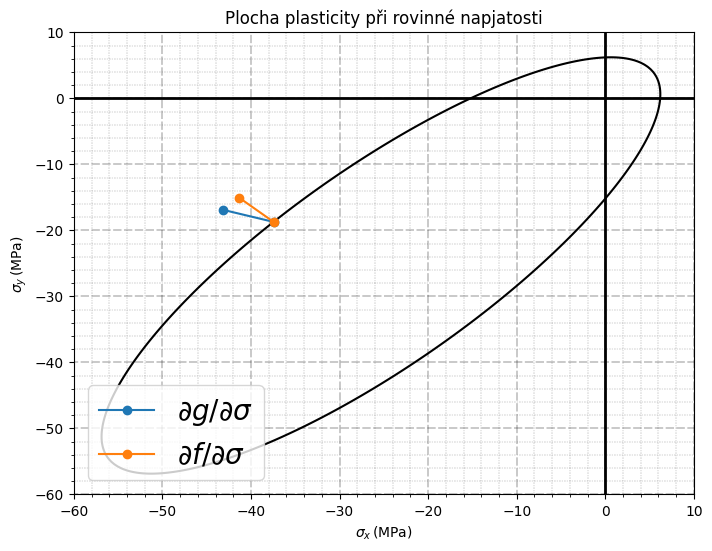

In [28]:
# Create a grid of sigma_1 and sigma_2 values
sigma1 = np.linspace(-60, 10, 200)
sigma2 = np.linspace(-60, 10, 200)
sigma1, sigma2 = np.meshgrid(sigma1, sigma2)

z = func(sigma1, sigma2)

# Plot the contour where the expression equals zero
plt.figure(figsize=(8, 6))

plt.axhline(0, color='k', lw=2)
plt.axvline(0, color='k', lw=2)

contour = plt.contour(sigma1, sigma2, z, levels=[0], colors='k')

scale = 15

plt.plot([sigma_x, sigma_x + smp.diff(g, sigma_1).subs(sigma_1, sigma_x).subs(sigma_2, sigma_y).subs(sigma_3, sigma_z) * scale], 
         [sigma_y, sigma_y + smp.diff(g, sigma_2).subs(sigma_1, sigma_x).subs(sigma_2, sigma_y).subs(sigma_3, sigma_z) * scale], '-o', label='$\partial g / \partial\sigma$')

plt.plot([sigma_x, sigma_x + smp.diff(f, sigma_1).subs(sigma_1, sigma_x).subs(sigma_2, sigma_y).subs(sigma_3, sigma_z) * scale], 
         [sigma_y, sigma_y + smp.diff(f, sigma_2).subs(sigma_1, sigma_x).subs(sigma_2, sigma_y).subs(sigma_3, sigma_z) * scale], '-o', label='$\partial f / \partial\sigma$')


plt.xlabel(r'$\sigma_x \, \mathrm{(MPa)}$')
plt.ylabel('$\sigma_y \, \mathrm{(MPa)}$')
plt.title('Plocha plasticity při rovinné napjatosti')

plt.grid(which="major", linestyle=(10, (20, 6)), color='black', lw=0.3)
plt.minorticks_on()
plt.grid(which="minor", linestyle=(0, (1, 3)), color='black', lw=0.3)

plt.legend(fontsize=20)

plt.show()

# Zatěžovací program 3

- Trojosý tlak s poměrem napětí $\sigma_x : \sigma_y : \sigma_z = 4:1:1$

In [29]:
sol = smp.solve(f.subs(sigma_2, sigma_1/4).subs(sigma_3, sigma_1/4), sigma_1)

sol = np.array(sol)

sigma_x = sol[sol<0][0]
sigma_y = sigma_x / 4
sigma_z = sigma_x / 4 

sigma = np.array([sigma_x, sigma_y, sigma_z])

C = (1 / young_modulus) * np.array([
    [1, -poissons_ratio, -poissons_ratio],
    [-poissons_ratio, 1, -poissons_ratio],
    [-poissons_ratio, -poissons_ratio, 1]
])

epsilon_el = C @ sigma.T
epsilon_el


display(Markdown('K plastickému přetváření za dvojosého tlaku začne docházet při hodnotách:'))
for i, (ax, eps, sig) in enumerate(zip(['x', 'y', 'z'], epsilon_el, sigma)):
    display(Math(f'\\sigma_{ax} = {sig}' + '\,\mathrm{MPa}'))
    display(Math(f'\\varepsilon_{ax} = {eps}'))    
    display(Markdown('<br>'))

K plastickému přetváření za dvojosého tlaku začne docházet při hodnotách:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<br>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<br>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<br>

In [30]:
lamb = ((-2/1000) / dgdsx.subs(sigma_1, sigma_x).subs(sigma_2, sigma_y).subs(sigma_3, sigma_z)).evalf()

In [31]:
# vypocet celkove deformace
for i, (ax, sig) in enumerate(zip(['x', 'y', 'z'], [sigma_1, sigma_2, sigma_3])):
    eps_pl = lamb * smp.diff(g, sig).subs(sigma_1, sigma_x).subs(sigma_2, sigma_y).subs(sigma_3, sigma_z)  # plasticka deformace: eps_pl = lambda * dg/dsigma
    eps_tot = eps_pl.evalf() + epsilon_el[i]  # soucet elasticke a plasticke deformace
    display(Math('\\varepsilon_{tot,' + ax + '} = ' + f'{eps_tot}'))

    # display(Math('df/d \\sigma_{' + ax + '} = ' + f'{smp.diff(f, sig).subs(sigma_1, sigma_x).subs(sigma_2, sigma_y).subs(sigma_3, sigma_z).evalf()}'))
    # display(Math('dg/d \\sigma_{' + ax + '} = ' + f'{smp.diff(g, sig).subs(sigma_1, sigma_x).subs(sigma_2, sigma_y).subs(sigma_3, sigma_z).evalf()}'))
    
    display(Markdown('<br>'))

<IPython.core.display.Math object>

<br>

<IPython.core.display.Math object>

<br>

<IPython.core.display.Math object>

<br>